In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
 
print('Numpy Version :', np.__version__)
print('Pandas Version :', pd.__version__)
print('Seaborn Version :', sns.__version__)

Numpy Version : 1.20.1
Pandas Version : 1.2.2
Seaborn Version : 0.11.0


In [46]:
Data = pd.read_csv('Train.csv')
Data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [47]:
Data = Data.drop(columns = 'ID')

In [48]:
Data_disc_applied = Data.copy()
Data_disc_applied['Discount_offered'] = [1/100] * Data['Discount_offered']
Data_disc_applied['cashback'] = Data['Cost_of_the_Product'] * Data['Discount_offered']
Data_disc_applied['cashback'] = [1/100] * Data_disc_applied['cashback'] 
Data_disc_applied['cost_after_discount'] = Data['Cost_of_the_Product'] - Data_disc_applied['cashback']

In [49]:
Data_disc_applied.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
8856,D,Ship,4,1,211,7,high,M,0.04,4476,1,8.44,202.56
6856,C,Flight,3,5,151,6,low,M,0.08,4692,1,12.08,138.92
6090,D,Ship,4,2,249,3,low,F,0.06,5051,1,14.94,234.06
3050,A,Ship,6,5,243,3,medium,F,0.35,2374,1,85.05,157.95
5901,B,Flight,3,5,271,3,low,F,0.09,5328,0,24.39,246.61


In [50]:
Data_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  object 
 1   Mode_of_Shipment     10999 non-null  object 
 2   Customer_care_calls  10999 non-null  int64  
 3   Customer_rating      10999 non-null  int64  
 4   Cost_of_the_Product  10999 non-null  int64  
 5   Prior_purchases      10999 non-null  int64  
 6   Product_importance   10999 non-null  object 
 7   Gender               10999 non-null  object 
 8   Discount_offered     10999 non-null  float64
 9   Weight_in_gms        10999 non-null  int64  
 10  Reached.on.Time_Y.N  10999 non-null  int64  
 11  cashback             10999 non-null  float64
 12  cost_after_discount  10999 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


In [51]:
Nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N', 'cashback','cost_after_discount']
Cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

In [52]:
Data_disc_applied['cashback'] = Data_disc_applied['cashback'].apply(np.int64)
Data_disc_applied['cost_after_discount'] = Data_disc_applied['cost_after_discount'].apply(np.int64)
Data_disc_applied['Discount_offered'] = Data_disc_applied['Discount_offered'].apply(np.int64)

In [53]:
Data_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
 11  cashback             10999 non-null  int64 
 12  cost_after_discount  10999 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [54]:
Data_disc_applied.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.0,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,0.0,3634.016729,0.596691,26.547686,182.682426
std,1.141490,1.413603,48.063272,1.522860,0.0,1635.377251,0.490584,33.001073,56.901337
min,2.000000,1.000000,96.000000,2.000000,0.0,1001.000000,0.000000,0.000000,36.000000
25%,3.000000,2.000000,169.000000,3.000000,0.0,1839.500000,0.000000,7.000000,140.000000
50%,4.000000,3.000000,214.000000,3.000000,0.0,4149.000000,1.000000,14.000000,186.000000
75%,5.000000,4.000000,251.000000,4.000000,0.0,5050.000000,1.000000,25.000000,231.000000
max,7.000000,5.000000,310.000000,10.000000,0.0,7846.000000,1.000000,185.000000,306.000000


In [55]:
Data_disc_applied[Cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


## Data Prepocession

### Missing Data

In [56]:
Data_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
 11  cashback             10999 non-null  int64 
 12  cost_after_discount  10999 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Tidak ada data yang missing

In [57]:
Cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
Nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N','cashback','cost_after_discount']

In [58]:
Data_disc_applied.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
cashback               0
cost_after_discount    0
dtype: int64

Tidak ada feature yang null

### Duplicated Data

In [59]:
print(Data_disc_applied.duplicated().sum()) #1
print(Data_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment']).sum()) #2
print(Data_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls']).sum()) #3
print(Data_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating']).sum()) #4
print(Data_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product']).sum()) #5
print(Data_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Weight_in_gms']).sum()) #6
print(Data_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Weight_in_gms','Reached.on.Time_Y.N']).sum()) #7
print(Data_disc_applied.duplicated(subset=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N','cashback','cost_after_discount']).sum())

0
10984
10909
10567
1846
1
1
0


### Outliers

In [60]:
len(Data_disc_applied)

10999

In [61]:
from scipy import stats

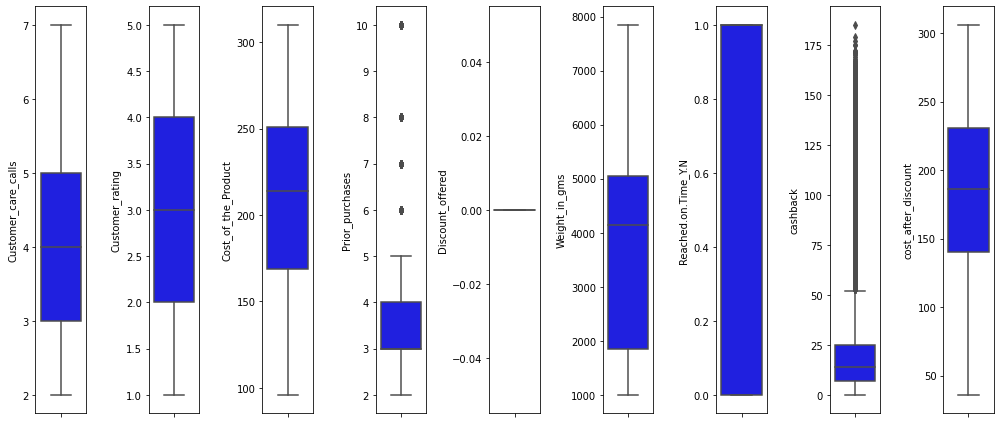

In [62]:
plt.figure(figsize=(14,6))
for i in range(0, len(Nums)):
  plt.subplot(1, len(Nums), i+1)
  sns.boxplot(y = Data_disc_applied[Nums[i]], color = 'blue', orient = 'v')
  plt.tight_layout()

In [63]:
print(f'Jumlah baris sebelum memfilter outlier: {len(Data_disc_applied)}')
filter = np.array([True] * len(Data_disc_applied))
for col in ['Cost_of_the_Product','Weight_in_gms','cashback']:
    Q1 = Data_disc_applied[col].quantile(0.25)
    Q3 = Data_disc_applied[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filter = ((Data_disc_applied[col] >= low_limit) & (Data_disc_applied[col] <= high_limit)) & filter
    
Data_filtered = Data_disc_applied[filter]
print(f'Jumlah baris setelah memfilter outlier: {len(Data_filtered)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 9214


In [64]:
Data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      9214 non-null   object
 1   Mode_of_Shipment     9214 non-null   object
 2   Customer_care_calls  9214 non-null   int64 
 3   Customer_rating      9214 non-null   int64 
 4   Cost_of_the_Product  9214 non-null   int64 
 5   Prior_purchases      9214 non-null   int64 
 6   Product_importance   9214 non-null   object
 7   Gender               9214 non-null   object
 8   Discount_offered     9214 non-null   int64 
 9   Weight_in_gms        9214 non-null   int64 
 10  Reached.on.Time_Y.N  9214 non-null   int64 
 11  cashback             9214 non-null   int64 
 12  cost_after_discount  9214 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 1007.8+ KB


### Normalization

In [65]:
Data_filtered.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.0,9214.000000,9214.000000,9214.000000,9214.000000
mean,4.111027,2.993597,211.418602,3.622205,0.0,3859.365422,0.518559,13.564142,196.884524
std,1.159364,1.411702,48.681230,1.520578,0.0,1648.827257,0.499683,10.055245,48.488206
min,2.000000,1.000000,96.000000,2.000000,0.0,1001.000000,0.000000,0.000000,48.000000
25%,3.000000,2.000000,170.000000,3.000000,0.0,1874.250000,0.000000,6.000000,158.000000
50%,4.000000,3.000000,217.000000,3.000000,0.0,4437.000000,1.000000,12.000000,202.000000
75%,5.000000,4.000000,252.000000,4.000000,0.0,5210.000000,1.000000,18.000000,237.000000
max,7.000000,5.000000,310.000000,10.000000,0.0,7588.000000,1.000000,52.000000,306.000000


In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
Data_filtered['Cost_of_the_Product'] = MinMaxScaler().fit_transform(Data_filtered['Cost_of_the_Product'].values.reshape(len(Data_filtered), 1))
Data_filtered['Weight_in_gms'] = MinMaxScaler().fit_transform(Data_filtered['Weight_in_gms'].values.reshape(len(Data_filtered), 1))
Data_filtered['cashback'] = MinMaxScaler().fit_transform(Data_filtered['cashback'].values.reshape(len(Data_filtered), 1))
Data_filtered['cost_after_discount'] = MinMaxScaler().fit_transform(Data_filtered['cost_after_discount'].values.reshape(len(Data_filtered), 1))
Data_filtered['Customer_care_calls'] = MinMaxScaler().fit_transform(Data_filtered['Customer_care_calls'].values.reshape(len(Data_filtered), 1))
Data_filtered['Customer_rating'] = MinMaxScaler().fit_transform(Data_filtered['Customer_rating'].values.reshape(len(Data_filtered), 1))
Data_filtered['Prior_purchases'] = MinMaxScaler().fit_transform(Data_filtered['Prior_purchases'].values.reshape(len(Data_filtered), 1))

In [67]:
Data_filtered.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.0,9214.000000,9214.000000,9214.000000,9214.000000
mean,0.422205,0.498399,0.539339,0.202776,0.0,0.433940,0.518559,0.260849,0.577072
std,0.231873,0.352926,0.227482,0.190072,0.0,0.250315,0.499683,0.193370,0.187939
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.345794,0.125000,0.0,0.132572,0.000000,0.115385,0.426357
50%,0.400000,0.500000,0.565421,0.125000,0.0,0.521634,1.000000,0.230769,0.596899
75%,0.600000,0.750000,0.728972,0.250000,0.0,0.638986,1.000000,0.346154,0.732558
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Feature Encoding

In [68]:
Cats = ['Warehouse_block','Mode_of_Shipment','Product_importance']
Cats_2 = ['Gender']

In [69]:
for i in Cats:
    onehots= pd.get_dummies(Data_filtered[Cats], prefix = 'cat')
    Data_final = Data_filtered.join(onehots)

In [70]:
Data_final = Data_final.drop(columns=Cats).copy()

In [71]:
Data_final.sample (10)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount,...,cat_B,cat_C,cat_D,cat_F,cat_Flight,cat_Road,cat_Ship,cat_high,cat_low,cat_medium
10893,0.4,0.25,0.537383,0.125,M,0,0.757249,0,0.153846,0.596899,...,1,0,0,0,0,0,1,0,1,0
5572,0.2,0.00,0.602804,0.125,M,0,0.498406,0,0.076923,0.666667,...,0,1,0,0,0,0,1,0,0,1
3509,0.0,0.50,0.448598,0.125,F,0,0.726583,1,0.288462,0.496124,...,0,0,0,1,0,0,1,0,0,1
1028,0.2,0.50,0.453271,0.125,M,0,0.332018,1,0.403846,0.476744,...,0,0,0,0,0,0,1,0,0,1
4360,0.4,1.00,0.214953,0.000,M,0,0.629877,1,0.038462,0.352713,...,0,1,0,0,0,1,0,0,1,0
6904,0.8,1.00,0.855140,0.250,M,0,0.045392,0,0.365385,0.817829,...,0,1,0,0,0,0,1,0,0,1
6260,0.8,1.00,0.757009,0.250,M,0,0.084560,0,0.230769,0.763566,...,0,0,0,0,0,0,1,0,1,0
8951,0.8,1.00,0.252336,0.125,M,0,0.720510,0,0.076923,0.375969,...,0,0,0,1,0,0,1,0,0,1
10951,0.6,0.25,0.691589,0.500,M,0,0.030059,0,0.038462,0.748062,...,0,0,0,1,0,1,0,0,1,0
8347,1.0,0.25,0.939252,0.250,F,0,0.057993,1,0.384615,0.883721,...,0,0,0,1,0,1,0,0,1,0


In [72]:
for i in Cats_2:
    onehots= pd.get_dummies(Data_filtered[Cats_2], prefix = 'Gender')
    Data_final_2 = Data_final.join(onehots)

In [73]:
Data_final_2 = Data_final_2.drop(columns=Cats_2).copy()

### Class Imbalance

In [74]:
Data_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  9214 non-null   float64
 1   Customer_rating      9214 non-null   float64
 2   Cost_of_the_Product  9214 non-null   float64
 3   Prior_purchases      9214 non-null   float64
 4   Discount_offered     9214 non-null   int64  
 5   Weight_in_gms        9214 non-null   float64
 6   Reached.on.Time_Y.N  9214 non-null   int64  
 7   cashback             9214 non-null   float64
 8   cost_after_discount  9214 non-null   float64
 9   cat_A                9214 non-null   uint8  
 10  cat_B                9214 non-null   uint8  
 11  cat_C                9214 non-null   uint8  
 12  cat_D                9214 non-null   uint8  
 13  cat_F                9214 non-null   uint8  
 14  cat_Flight           9214 non-null   uint8  
 15  cat_Road             9214 non-null   

In [75]:
Data_final_2['cat_A'] = Data_final_2['cat_A'].apply(np.int64)
Data_final_2['cat_B'] = Data_final_2['cat_B'].apply(np.int64)
Data_final_2['cat_C'] = Data_final_2['cat_C'].apply(np.int64)
Data_final_2['cat_D'] = Data_final_2['cat_D'].apply(np.int64)
Data_final_2['cat_F'] = Data_final_2['cat_F'].apply(np.int64)
Data_final_2['cat_Flight'] = Data_final_2['cat_Flight'].apply(np.int64)
Data_final_2['cat_Road'] = Data_final_2['cat_Road'].apply(np.int64)
Data_final_2['cat_Ship'] = Data_final_2['cat_Ship'].apply(np.int64)
Data_final_2['cat_high'] = Data_final_2['cat_high'].apply(np.int64)
Data_final_2['cat_low'] = Data_final_2['cat_low'].apply(np.int64)
Data_final_2['cat_medium'] = Data_final_2['cat_medium'].apply(np.int64)
Data_final_2['Gender_F'] = Data_final_2['Gender_F'].apply(np.int64)
Data_final_2['Gender_M'] = Data_final_2['Gender_M'].apply(np.int64)

In [76]:
Data_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  9214 non-null   float64
 1   Customer_rating      9214 non-null   float64
 2   Cost_of_the_Product  9214 non-null   float64
 3   Prior_purchases      9214 non-null   float64
 4   Discount_offered     9214 non-null   int64  
 5   Weight_in_gms        9214 non-null   float64
 6   Reached.on.Time_Y.N  9214 non-null   int64  
 7   cashback             9214 non-null   float64
 8   cost_after_discount  9214 non-null   float64
 9   cat_A                9214 non-null   int64  
 10  cat_B                9214 non-null   int64  
 11  cat_C                9214 non-null   int64  
 12  cat_D                9214 non-null   int64  
 13  cat_F                9214 non-null   int64  
 14  cat_Flight           9214 non-null   int64  
 15  cat_Road             9214 non-null   

In [77]:
Data_final_2.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount,cat_A,...,cat_D,cat_F,cat_Flight,cat_Road,cat_Ship,cat_high,cat_low,cat_medium,Gender_F,Gender_M
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.0,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,...,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000
mean,0.422205,0.498399,0.539339,0.202776,0.0,0.433940,0.518559,0.260849,0.577072,0.168439,...,0.167571,0.331452,0.163230,0.159757,0.677013,0.083786,0.486217,0.429998,0.502496,0.497504
std,0.231873,0.352926,0.227482,0.190072,0.0,0.250315,0.499683,0.193370,0.187939,0.374276,...,0.373505,0.470761,0.369595,0.366400,0.467643,0.277081,0.499837,0.495102,0.500021,0.500021
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.345794,0.125000,0.0,0.132572,0.000000,0.115385,0.426357,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.500000,0.565421,0.125000,0.0,0.521634,1.000000,0.230769,0.596899,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.600000,0.750000,0.728972,0.250000,0.0,0.638986,1.000000,0.346154,0.732558,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print("AUC: %.2f" % auc(fpr, tpr))
    print(confusion_matrix(ytest, pred))

In [79]:
DF2 = Data_final_2

X = DF2.drop(columns=['Reached.on.Time_Y.N'])
y = DF2['Reached.on.Time_Y.N'] # target

# split Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [80]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=42)
#model = LogisticRegression(random_state=42)
lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)
eval_classification(lr1, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.58
Precision (Test Set): 0.59
Recall (Test Set): 0.60
F1-Score (Test Set): 0.59
AUC: 0.58
[[759 591]
 [573 842]]


In [81]:
print('Train score: ' + str(lr1.score(X_train, y_train))) 
print('Test score:' + str(lr1.score(X_test, y_test)))

Train score: 0.568770351992557
Test score:0.5790235081374322


In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision'
                           ,n_iter=20)

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)
print('Train score: ' + str(model.score(X_train, y_train))) 
print('Test score:' + str(model.score(X_test, y_test)))

Accuracy (Test Set): 0.53
Precision (Test Set): 0.53
Recall (Test Set): 0.89
F1-Score (Test Set): 0.66
AUC: 0.52
[[ 209 1141]
 [ 153 1262]]
Train score: 0.5346779900920028
Test score:0.525176862255514


In [83]:
print('Train score: ' + str(model.score(X_train, y_train))) 
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.5346779900920028
Test score:0.525176862255514


In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

In [85]:
# List Hyperparameters yang akan diuji
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# list hyperparameter:
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] 
hyperparameters = dict(penalty=penalty, C=C)

lr2 = LogisticRegression(random_state=42) 
model = RandomizedSearchCV(lr2, hyperparameters, cv=5, random_state=42, scoring='precision') #crossval = 5

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.53
Precision (Test Set): 0.53
Recall (Test Set): 0.89
F1-Score (Test Set): 0.66
AUC: 0.52
[[ 209 1141]
 [ 153 1262]]
